# Train model with STFT Feature (1024 feature)

### Buzz 1

#### load data

In [3]:
import numpy as np
Noneswarming_train_buzz_1_stft = np.load("Train_buzz_1_stft/Noneswarming_train.npy")
Swarming_train_buzz_1_stft = np.load("Train_buzz_1_stft/Swarming_train.npy")
Noneswarming_test_buzz_1_stft = np.load("Test_buzz_1_stft/Noneswarming_test.npy")
Swarming_test_buzz_1_stft = np.load("Test_buzz_1_stft/Swarming_test.npy")
Noneswarming_val_buzz_1_stft = np.load("Val_buzz_1_stft/Noneswarming_val.npy")
Swarming_val_buzz_1_stft = np.load("Val_buzz_1_stft/Swarming_val.npy")


In [4]:
train_data_buzz_1_stft = np.vstack([Noneswarming_train_buzz_1_stft, Swarming_train_buzz_1_stft])
train_labels_buzz_1_stft = np.array([0] * Noneswarming_train_buzz_1_stft.shape[0] + [1] * Swarming_train_buzz_1_stft.shape[0])

val_data_buzz_1_stft = np.vstack([Noneswarming_val_buzz_1_stft, Swarming_val_buzz_1_stft])
val_labels_buzz_1_stft = np.array([0] * Noneswarming_val_buzz_1_stft.shape[0] + [1] * Swarming_val_buzz_1_stft.shape[0])

test_data_buzz_1_stft = np.vstack([Noneswarming_test_buzz_1_stft, Swarming_test_buzz_1_stft])
test_labels_buzz_1_stft = np.array([0] * Noneswarming_test_buzz_1_stft.shape[0] + [1] * Swarming_test_buzz_1_stft.shape[0])

In [5]:
print("Train Data Shape:", train_data_buzz_1_stft.shape)
print("Train Labels Shape:", train_labels_buzz_1_stft.shape)

print("Validation Data Shape:", val_data_buzz_1_stft.shape)
print("Validation Labels Shape:", val_labels_buzz_1_stft.shape)

print("Test Data Shape:", test_data_buzz_1_stft.shape)
print("Test Labels Shape:", test_labels_buzz_1_stft.shape)

Train Data Shape: (23384, 1024)
Train Labels Shape: (23384,)
Validation Data Shape: (5641, 1024)
Validation Labels Shape: (5641,)
Test Data Shape: (12773, 1024)
Test Labels Shape: (12773,)


# 1DCNN

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(1024, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_buzz_1_stft,train_labels_buzz_1_stft, epochs=10, batch_size=32, validation_data=(val_data_buzz_1_stft,val_labels_buzz_1_stft))

Epoch 1/10
731/731 [==============================] - 171s 225ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 1.1077 - val_accuracy: 0.8858
Epoch 2/10
731/731 [==============================] - 122s 166ms/step - loss: 2.3609e-05 - accuracy: 1.0000 - val_loss: 1.1465 - val_accuracy: 0.8896
Epoch 3/10
731/731 [==============================] - 121s 166ms/step - loss: 7.9242e-06 - accuracy: 1.0000 - val_loss: 1.0575 - val_accuracy: 0.8936
Epoch 4/10
731/731 [==============================] - 122s 167ms/step - loss: 2.8055e-06 - accuracy: 1.0000 - val_loss: 1.1018 - val_accuracy: 0.9098
Epoch 5/10
731/731 [==============================] - 121s 165ms/step - loss: 1.5206e-06 - accuracy: 1.0000 - val_loss: 1.0605 - val_accuracy: 0.8979
Epoch 6/10
731/731 [==============================] - 121s 166ms/step - loss: 8.0951e-07 - accuracy: 1.0000 - val_loss: 1.0177 - val_accuracy: 0.9023
Epoch 7/10
731/731 [==============================] - 122s 167ms/step - loss: 4.9956e-07 - accuracy: 1.0

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data_buzz_1_stft , test_labels_buzz_1_stft)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 11s 28ms/step - loss: 2.9179 - accuracy: 0.7541
Test accuracy: 0.7540906667709351


400/400 [==============================] - 11s 27ms/step


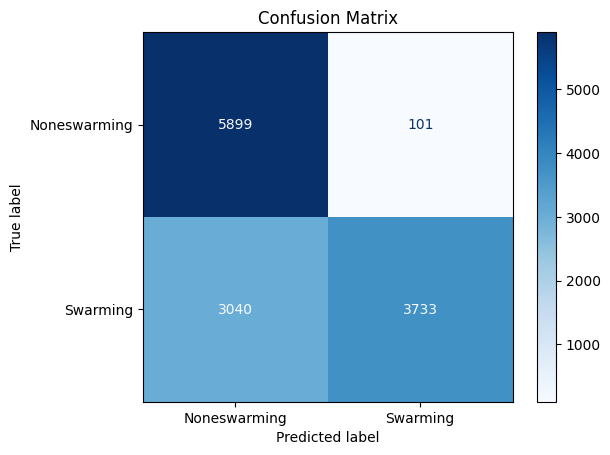

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_data_buzz_1_stft)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1_stft, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# RNN/LSTM

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model2 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(1024, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_data_buzz_1_stft ,train_labels_buzz_1_stft, epochs=10, batch_size=32, validation_data=(val_data_buzz_1_stft,val_labels_buzz_1_stft))
model2.summary()

Epoch 1/10
731/731 [==============================] - 2014s 3s/step - loss: 0.6955 - accuracy: 0.5410 - val_loss: 0.6932 - val_accuracy: 0.5318
Epoch 2/10
731/731 [==============================] - 2048s 3s/step - loss: 0.6896 - accuracy: 0.5443 - val_loss: 0.6911 - val_accuracy: 0.5318
Epoch 3/10
731/731 [==============================] - 2908s 4s/step - loss: 0.6894 - accuracy: 0.5443 - val_loss: 0.6912 - val_accuracy: 0.5318
Epoch 4/10
731/731 [==============================] - 3376s 5s/step - loss: 0.6894 - accuracy: 0.5443 - val_loss: 0.6916 - val_accuracy: 0.5318
Epoch 5/10
731/731 [==============================] - 2653s 4s/step - loss: 0.6894 - accuracy: 0.5443 - val_loss: 0.6912 - val_accuracy: 0.5318
Epoch 6/10
731/731 [==============================] - 2192s 3s/step - loss: 0.6894 - accuracy: 0.5443 - val_loss: 0.6914 - val_accuracy: 0.5318
Epoch 7/10
731/731 [==============================] - 2191s 3s/step - loss: 0.6893 - accuracy: 0.5443 - val_loss: 0.6911 - val_accuracy:

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_data_buzz_1_stft , test_labels_buzz_1_stft)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 310s 774ms/step - loss: 0.7026 - accuracy: 0.4697
Test accuracy: 0.4697408676147461


400/400 [==============================] - 303s 753ms/step


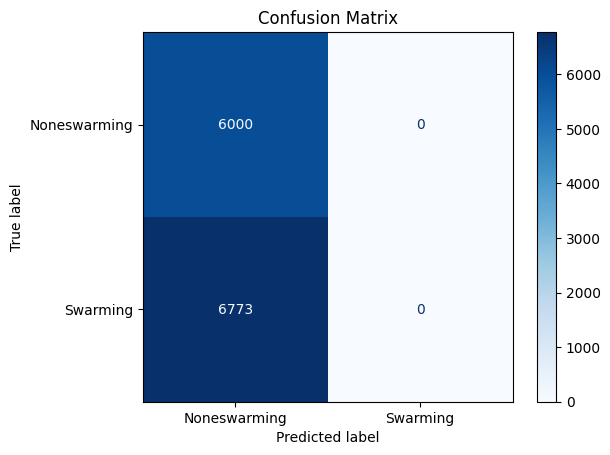

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model2.predict(test_data_buzz_1_stft)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1_stft, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(train_data_buzz_1_stft, train_labels_buzz_1_stft)
val_predictions = rf_classifier.predict(val_data_buzz_1_stft)

# Calculate the accuracy on the validation set
val_accuracy_rf = accuracy_score(val_labels_buzz_1_stft, val_predictions)
print("Validation Accuracy:", val_accuracy_rf)
# Predictions on the test set
rf_predictions = rf_classifier.predict(test_data_buzz_1_stft)
test_accuracy_rf = accuracy_score(test_labels_buzz_1_stft, rf_predictions)
print(f'Random Forest Accuracy: {test_accuracy_rf}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_1_stft, rf_predictions))
print(classification_report(test_labels_buzz_1_stft, rf_predictions))


Validation Accuracy: 0.7358624357383443
Random Forest Accuracy: 0.6476160651373992
[[1500 4500]
 [   1 6772]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40      6000
           1       0.60      1.00      0.75      6773

    accuracy                           0.65     12773
   macro avg       0.80      0.62      0.58     12773
weighted avg       0.79      0.65      0.59     12773



# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier.fit(train_data_buzz_1_stft, train_labels_buzz_1_stft)

# Predictions on the validation set
val_predictions_knn = knn_classifier.predict(val_data_buzz_1_stft)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn = accuracy_score(val_labels_buzz_1_stft, val_predictions_knn)
print("Validation Accuracy (KNN):", val_accuracy_knn)

# Predictions on the test set for KNN
knn_predictions = knn_classifier.predict(test_data_buzz_1_stft)
test_accuracy_knn = accuracy_score(test_labels_buzz_1_stft, knn_predictions)
print(f'KNN Accuracy: {test_accuracy_knn}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_1_stft, knn_predictions))
print(classification_report(test_labels_buzz_1_stft, knn_predictions))

Validation Accuracy (KNN): 0.892040418365538
KNN Accuracy: 0.7754638690988804
[[5351  649]
 [2219 4554]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      6000
           1       0.88      0.67      0.76      6773

    accuracy                           0.78     12773
   macro avg       0.79      0.78      0.77     12773
weighted avg       0.80      0.78      0.77     12773



# SVM

In [14]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier.fit(train_data_buzz_1_stft, train_labels_buzz_1_stft)

# Predictions on the validation set for SVM
val_predictions_svm = svm_classifier.predict(val_data_buzz_1_stft)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm = accuracy_score(val_labels_buzz_1_stft, val_predictions_svm)
print("Validation Accuracy (SVM):", val_accuracy_svm)

# Predictions on the test set for SVM
svm_predictions = svm_classifier.predict(test_data_buzz_1_stft)
test_accuracy_svm = accuracy_score(test_labels_buzz_1_stft, svm_predictions)
print(f'SVM Accuracy: {test_accuracy_svm}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_1_stft, svm_predictions))
print(classification_report(test_labels_buzz_1_stft, svm_predictions))

Validation Accuracy (SVM): 0.9680907640489275
SVM Accuracy: 0.9423784545525719
[[5675  325]
 [ 411 6362]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6000
           1       0.95      0.94      0.95      6773

    accuracy                           0.94     12773
   macro avg       0.94      0.94      0.94     12773
weighted avg       0.94      0.94      0.94     12773



# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier.fit(train_data_buzz_1_stft, train_labels_buzz_1_stft)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg = logreg_classifier.predict(val_data_buzz_1_stft)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg = accuracy_score(val_labels_buzz_1_stft, val_predictions_logreg)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg)

# Predictions on the test set for Logistic Regression
logreg_predictions = logreg_classifier.predict(test_data_buzz_1_stft)
test_accuracy_logreg = accuracy_score(test_labels_buzz_1_stft, logreg_predictions)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_1_stft, logreg_predictions))
print(classification_report(test_labels_buzz_1_stft, logreg_predictions))

Validation Accuracy (Logistic Regression): 0.9422088282219465
Logistic Regression Accuracy: 0.9587410944962029
[[5899  101]
 [ 426 6347]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6000
           1       0.98      0.94      0.96      6773

    accuracy                           0.96     12773
   macro avg       0.96      0.96      0.96     12773
weighted avg       0.96      0.96      0.96     12773



c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Buzz 2

#### load data

In [1]:
import numpy as np
Noneswarming_train_buzz_2_stft = np.load("Train_buzz_2_stft/Noneswarming_train.npy")
Swarming_train_buzz_2_stft = np.load("Train_buzz_2_stft/Swarming_train.npy")
Noneswarming_test_buzz_2_stft = np.load("Test_buzz_2_stft/Noneswarming_test.npy")
Swarming_test_buzz_2_stft = np.load("Test_buzz_2_stft/Swarming_test.npy")
Noneswarming_val_buzz_2_stft = np.load("Val_buzz_2_stft/Noneswarming_val.npy")
Swarming_val_buzz_2_stft = np.load("Val_buzz_2_stft/Swarming_val.npy")

In [2]:
train_data_buzz_2_stft = np.vstack([Noneswarming_train_buzz_2_stft, Swarming_train_buzz_2_stft])
train_labels_buzz_2_stft = np.array([0] * Noneswarming_train_buzz_2_stft.shape[0] + [1] * Swarming_train_buzz_2_stft.shape[0])

val_data_buzz_2_stft = np.vstack([Noneswarming_val_buzz_2_stft, Swarming_val_buzz_2_stft])
val_labels_buzz_2_stft = np.array([0] * Noneswarming_val_buzz_2_stft.shape[0] + [1] * Swarming_val_buzz_2_stft.shape[0])

test_data_buzz_2_stft = np.vstack([Noneswarming_test_buzz_2_stft, Swarming_test_buzz_2_stft])
test_labels_buzz_2_stft = np.array([0] * Noneswarming_test_buzz_2_stft.shape[0] + [1] * Swarming_test_buzz_2_stft.shape[0])

# 1DCNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model3 = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(1024, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model3.fit(train_data_buzz_2_stft,train_labels_buzz_2_stft, epochs=10, batch_size=32, validation_data=(val_data_buzz_2_stft,val_labels_buzz_2_stft))

Epoch 1/10
773/773 [==============================] - 135s 173ms/step - loss: 0.0643 - accuracy: 0.9793 - val_loss: 0.0522 - val_accuracy: 0.9767
Epoch 2/10
773/773 [==============================] - 126s 163ms/step - loss: 0.0120 - accuracy: 0.9978 - val_loss: 0.2042 - val_accuracy: 0.9480
Epoch 3/10
773/773 [==============================] - 126s 164ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0232 - val_accuracy: 0.9889
Epoch 4/10
773/773 [==============================] - 125s 162ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0233 - val_accuracy: 0.9936
Epoch 5/10
773/773 [==============================] - 126s 163ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0431 - val_accuracy: 0.9816
Epoch 6/10
773/773 [==============================] - 127s 164ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0306 - val_accuracy: 0.9875
Epoch 7/10
773/773 [==============================] - 126s 163ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.5163 -

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_data_buzz_2_stft , test_labels_buzz_2_stft)

print(f'Test accuracy: {test_acc}')

362/362 [==============================] - 11s 31ms/step - loss: 0.0478 - accuracy: 0.9980
Test accuracy: 0.9980129599571228


362/362 [==============================] - 12s 33ms/step


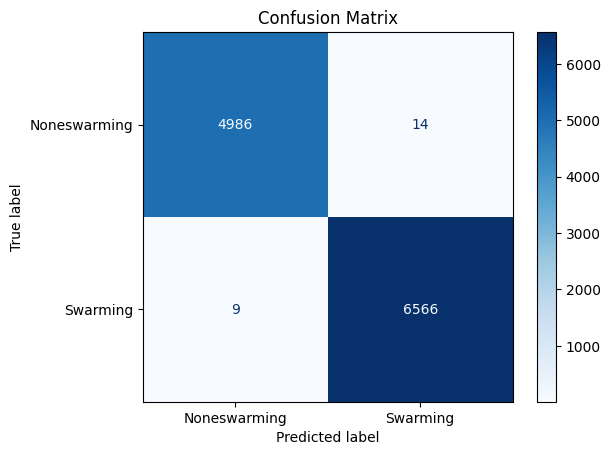

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model3.predict(test_data_buzz_2_stft)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2_stft, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# RNN/LSTM

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model4 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(1024, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model4.fit(train_data_buzz_2_stft ,train_labels_buzz_2_stft, epochs=10, batch_size=32, validation_data=(val_data_buzz_2_stft,val_labels_buzz_2_stft))
model4.summary()

Epoch 1/10
773/773 [==============================] - 2016s 3s/step - loss: 0.6925 - accuracy: 0.5184 - val_loss: 0.6186 - val_accuracy: 0.5790
Epoch 2/10
773/773 [==============================] - 2007s 3s/step - loss: 0.6914 - accuracy: 0.5132 - val_loss: 0.7041 - val_accuracy: 0.4707
Epoch 3/10
773/773 [==============================] - 2059s 3s/step - loss: 0.6933 - accuracy: 0.5050 - val_loss: 0.6953 - val_accuracy: 0.4707
Epoch 4/10
773/773 [==============================] - 2251s 3s/step - loss: 0.6930 - accuracy: 0.5118 - val_loss: 0.6949 - val_accuracy: 0.4707
Epoch 5/10
773/773 [==============================] - 2226s 3s/step - loss: 0.6929 - accuracy: 0.5118 - val_loss: 0.6941 - val_accuracy: 0.4707
Epoch 6/10
773/773 [==============================] - 2148s 3s/step - loss: 0.6929 - accuracy: 0.5118 - val_loss: 0.6948 - val_accuracy: 0.4707
Epoch 7/10
773/773 [==============================] - 2233s 3s/step - loss: 0.6929 - accuracy: 0.5118 - val_loss: 0.6949 - val_accuracy:

362/362 [==============================] - 299s 823ms/step


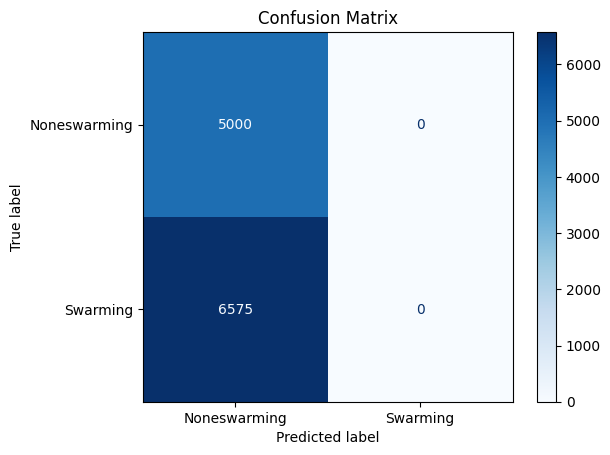

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model4.predict(test_data_buzz_2_stft)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2_stft, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier_2.fit(train_data_buzz_2_stft, train_labels_buzz_2_stft)
val_predictions_2 = rf_classifier_2.predict(val_data_buzz_2_stft)

# Calculate the accuracy on the validation set
val_accuracy_rf_2 = accuracy_score(val_labels_buzz_2_stft, val_predictions_2)
print("Validation Accuracy:", val_accuracy_rf_2)
# Predictions on the test set
rf_predictions_2 = rf_classifier_2.predict(test_data_buzz_2_stft)
test_accuracy_rf_2 = accuracy_score(test_labels_buzz_2_stft, rf_predictions_2)
print(f'Random Forest Accuracy: {test_accuracy_rf_2}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_2_stft, rf_predictions_2))
print(classification_report(test_labels_buzz_2_stft, rf_predictions_2))

Validation Accuracy: 0.764650506001412
Random Forest Accuracy: 0.568120950323974
[[   1 4999]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      5000
           1       0.57      1.00      0.72      6575

    accuracy                           0.57     11575
   macro avg       0.78      0.50      0.36     11575
weighted avg       0.75      0.57      0.41     11575



# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier_2 = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier_2.fit(train_data_buzz_2_stft, train_labels_buzz_2_stft)

# Predictions on the validation set
val_predictions_knn_2 = knn_classifier_2.predict(val_data_buzz_2_stft)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn_2 = accuracy_score(val_labels_buzz_2_stft, val_predictions_knn_2)
print("Validation Accuracy (KNN):", val_accuracy_knn_2)

# Predictions on the test set for KNN
knn_predictions_2 = knn_classifier_2.predict(test_data_buzz_2_stft)
test_accuracy_knn_2 = accuracy_score(test_labels_buzz_2_stft, knn_predictions_2)
print(f'KNN Accuracy: {test_accuracy_knn_2}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_2_stft, knn_predictions_2))
print(classification_report(test_labels_buzz_2_stft, knn_predictions_2))

Validation Accuracy (KNN): 0.9844669333960931
KNN Accuracy: 0.9944708423326134
[[4940   60]
 [   4 6571]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5000
           1       0.99      1.00      1.00      6575

    accuracy                           0.99     11575
   macro avg       1.00      0.99      0.99     11575
weighted avg       0.99      0.99      0.99     11575



# SVM

In [12]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier_2 = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier_2.fit(train_data_buzz_2_stft, train_labels_buzz_2_stft)

# Predictions on the validation set for SVM
val_predictions_svm_2 = svm_classifier_2.predict(val_data_buzz_2_stft)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm_2 = accuracy_score(val_labels_buzz_2_stft, val_predictions_svm_2)
print("Validation Accuracy (SVM):", val_accuracy_svm_2)

# Predictions on the test set for SVM
svm_predictions_2 = svm_classifier_2.predict(test_data_buzz_2_stft)
test_accuracy_svm_2 = accuracy_score(test_labels_buzz_2_stft, svm_predictions_2)
print(f'SVM Accuracy: {test_accuracy_svm_2}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_2_stft, svm_predictions_2))
print(classification_report(test_labels_buzz_2_stft, svm_predictions_2))

Validation Accuracy (SVM): 0.9962344080960226
SVM Accuracy: 0.9909287257019438
[[4896  104]
 [   1 6574]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5000
           1       0.98      1.00      0.99      6575

    accuracy                           0.99     11575
   macro avg       0.99      0.99      0.99     11575
weighted avg       0.99      0.99      0.99     11575



# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier_2 = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier_2.fit(train_data_buzz_2_stft, train_labels_buzz_2_stft)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg_2 = logreg_classifier_2.predict(val_data_buzz_2_stft)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg_2 = accuracy_score(val_labels_buzz_2_stft, val_predictions_logreg_2)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg_2)

# Predictions on the test set for Logistic Regression
logreg_predictions_2 = logreg_classifier_2.predict(test_data_buzz_2_stft)
test_accuracy_logreg_2 = accuracy_score(test_labels_buzz_2_stft, logreg_predictions_2)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg_2}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_2_stft, logreg_predictions_2))
print(classification_report(test_labels_buzz_2_stft, logreg_predictions_2))

Validation Accuracy (Logistic Regression): 0.987997175806072
Logistic Regression Accuracy: 0.9949892008639308
[[4942   58]
 [   0 6575]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5000
           1       0.99      1.00      1.00      6575

    accuracy                           0.99     11575
   macro avg       1.00      0.99      0.99     11575
weighted avg       1.00      0.99      0.99     11575



c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
